# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score, balanced_accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [4]:
print(df.shape) 
df.info() 
df.isna().sum().sort_values(ascending=False) #check missing values

(1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

# Data Cleaning

In [5]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns] #clean column names

In [6]:
before = df.shape[0] #remove duplicates if any
df = df.drop_duplicates()
after = df.shape[0]
print("Removed duplicates:", before - after)

Removed duplicates: 0


# Exploratory Data Analysis (EDA)

In [7]:
df.describe(include="all").T #summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1000.0,NaN,NaN,NaN,340.5,240.397673,1.0,125.75,300.5,550.25,800.0
No_Pation,1000.0,NaN,NaN,NaN,270551.408,3380757.821973,123.0,24063.75,34395.5,45384.25,75435657.0
Gender,1000,3,M,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,1000.0,NaN,NaN,NaN,53.528,8.799241,20.0,51.0,55.0,59.0,79.0
Urea,1000.0,NaN,NaN,NaN,5.124743,2.935165,0.5,3.7,4.6,5.7,38.9
Cr,1000.0,NaN,NaN,NaN,68.943,59.984747,6.0,48.0,60.0,73.0,800.0
HbA1c,1000.0,NaN,NaN,NaN,8.28116,2.534003,0.9,6.5,8.0,10.2,16.0
Chol,1000.0,NaN,NaN,NaN,4.86282,1.301738,0.0,4.0,4.8,5.6,10.3
TG,1000.0,NaN,NaN,NaN,2.34961,1.401176,0.3,1.5,2.0,2.9,13.8
HDL,1000.0,NaN,NaN,NaN,1.20475,0.660414,0.2,0.9,1.1,1.3,9.9


### 1) Class Distribution

In [8]:
df["CLASS"].value_counts()


CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [9]:
df["CLASS"].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [10]:
df["CLASS"] = df["CLASS"].astype(str).str.strip().str.upper() #clean class labels

In [11]:
df["CLASS"].value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

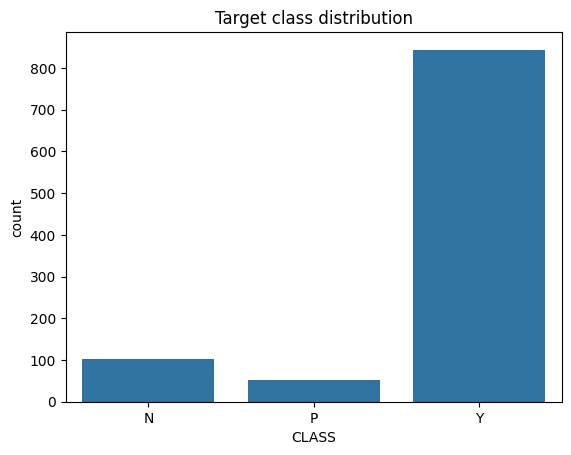

In [12]:
sns.countplot(x="CLASS", data=df)
plt.title("Target class distribution")
plt.show()

### 2) Numeric distributions

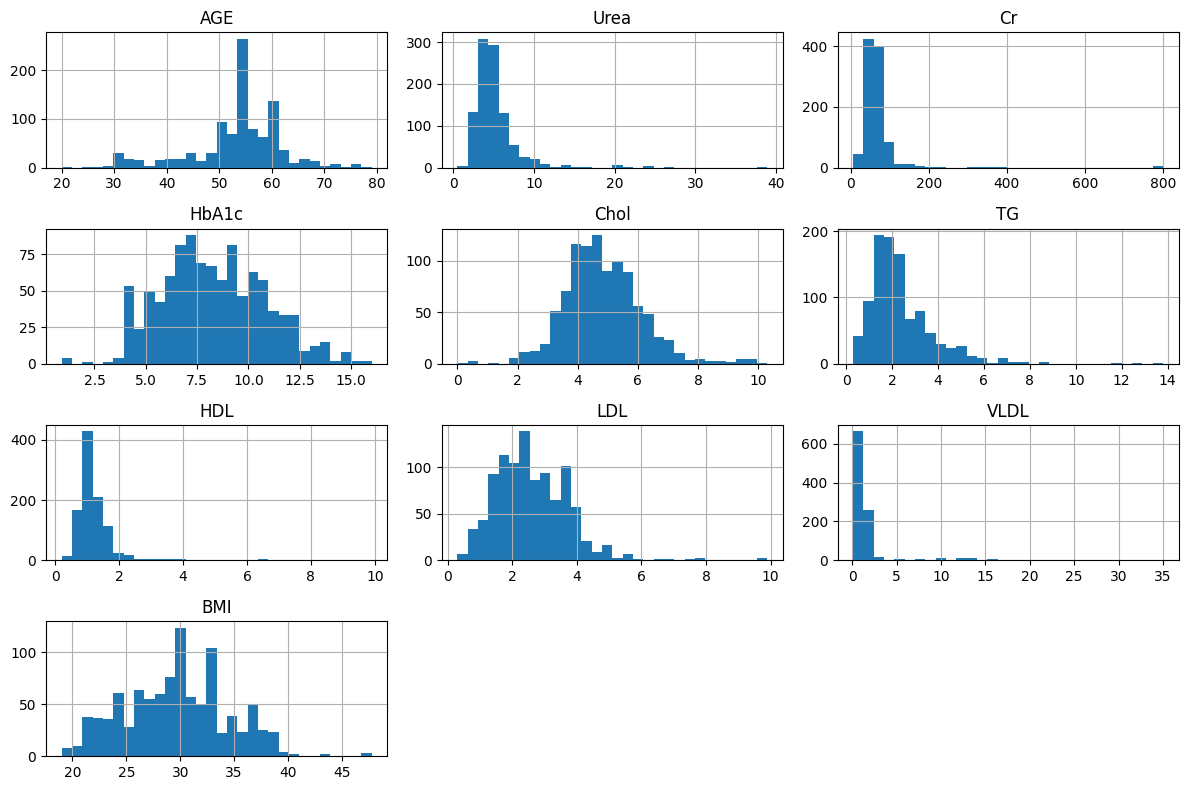

In [13]:
num_cols = ["AGE","Urea","Cr","HbA1c","Chol","TG","HDL","LDL","VLDL","BMI"]
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

### 3) Correlation heatmap

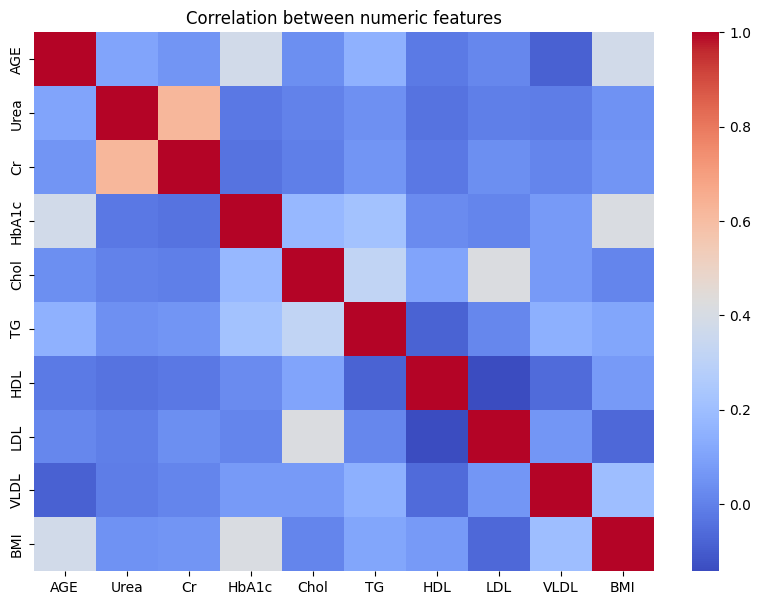

In [14]:
plt.figure(figsize=(10,7)) #relation between columns
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation between numeric features")
plt.show()

### 4) Medical intuition

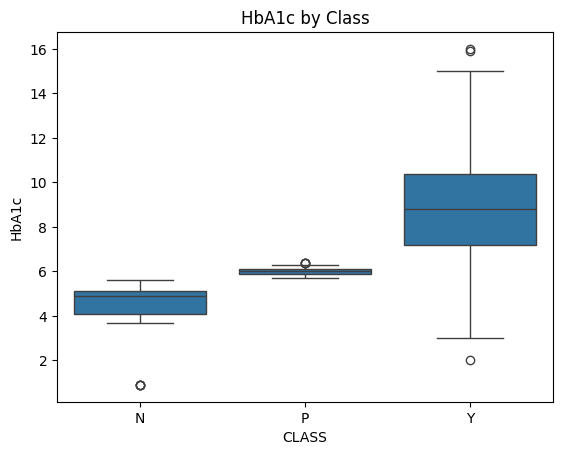

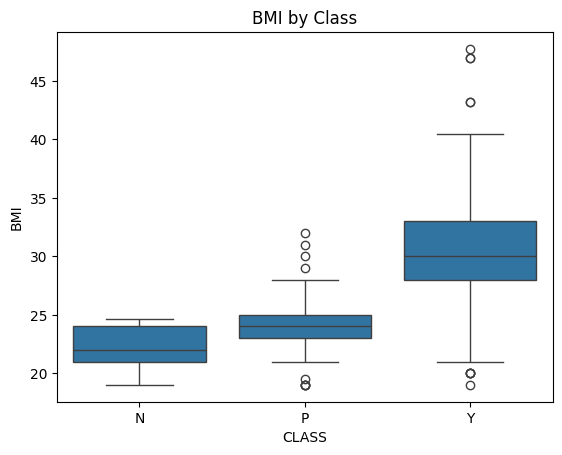

In [15]:
sns.boxplot(x="CLASS", y="HbA1c", data=df)
plt.title("HbA1c by Class")
plt.show()

sns.boxplot(x="CLASS", y="BMI", data=df)
plt.title("BMI by Class")
plt.show()

# Preprocessing pipeline

In [ ]:
X = df.drop(columns=["CLASS","ID", "No_Pation"]) #drop id and no_pation
y = df["CLASS"]

X_train, X_test, y_train, y_test = train_test_split( #split train test
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
cat_cols = ["Gender"] #identify categorical vs numeric for processing
num_cols = [c for c in X.columns if c not in cat_cols]

#fill missing values
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


# Classification models

### Train + evaluate helper

In [ ]:
def evaluate_pipeline(pipe, X_train, y_train, X_test, y_test, title="Model"): #train model
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    bacc = balanced_accuracy_score(y_test, preds)
    macro_f1 = f1_score(y_test, preds, average="macro")

    print(f"\n{title}")
    print("Accuracy:", round(acc, 4))
    print("Balanced Acc:", round(bacc, 4))
    print("Macro F1:", round(macro_f1, 4))
    print("\nReport:\n", classification_report(y_test, preds))

    labels = sorted(y.unique())
    cm = confusion_matrix(y_test, preds, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

    return {"model": title, "accuracy": acc, "balanced_acc": bacc, "macro_f1": macro_f1, "pipeline": pipe}


### Logistic Regression pipeline

In [19]:
log_reg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

### Random Forest pipeline

In [20]:
rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])

### Gradient Boosting pipelin

In [21]:
gb = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingClassifier(random_state=42))
])


Logistic Regression
Accuracy: 0.935
Balanced Acc: 0.8525
Macro F1: 0.8045

Report:
               precision    recall  f1-score   support

           N       0.86      0.90      0.88        21
           P       0.47      0.70      0.56        10
           Y       0.99      0.95      0.97       169

    accuracy                           0.94       200
   macro avg       0.77      0.85      0.80       200
weighted avg       0.95      0.94      0.94       200



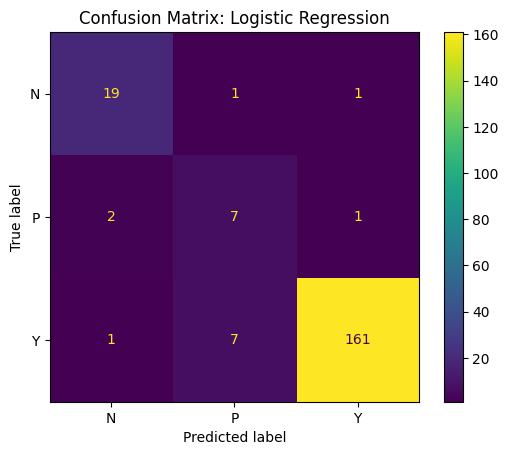


Random Forest
Accuracy: 0.995
Balanced Acc: 0.9667
Macro F1: 0.9815

Report:
               precision    recall  f1-score   support

           N       1.00      1.00      1.00        21
           P       1.00      0.90      0.95        10
           Y       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



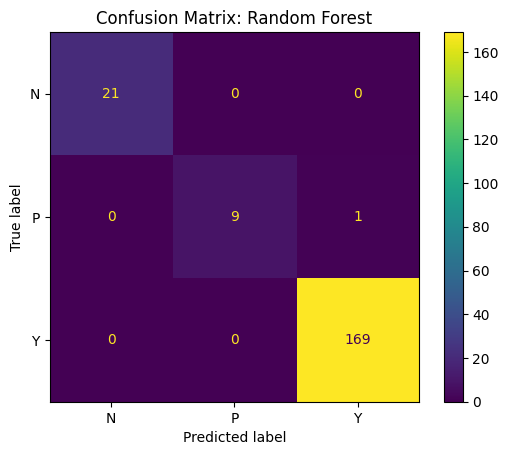


Gradient Boosting
Accuracy: 0.995
Balanced Acc: 0.9667
Macro F1: 0.9815

Report:
               precision    recall  f1-score   support

           N       1.00      1.00      1.00        21
           P       1.00      0.90      0.95        10
           Y       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



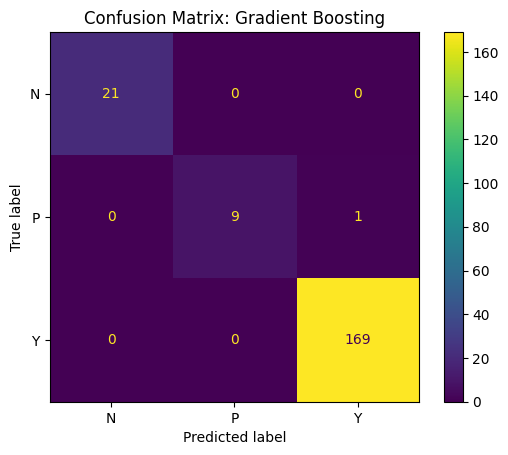

,model,accuracy,balanced_acc,macro_f1
1,Random Forest,0.995,0.966667,0.981473
2,Gradient Boosting,0.995,0.966667,0.981473
0,Logistic Regression,0.935,0.852475,0.804533



Best model by Macro F1: Random Forest


In [ ]:
#pick best model
results = [] 
results.append(evaluate_pipeline(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression"))
results.append(evaluate_pipeline(rf, X_train, y_train, X_test, y_test, "Random Forest"))
results.append(evaluate_pipeline(gb, X_train, y_train, X_test, y_test, "Gradient Boosting"))

summary = pd.DataFrame([{k:v for k,v in r.items() if k!="pipeline"} for r in results])
display(summary.sort_values("macro_f1", ascending=False))

best = max(results, key=lambda r: r["macro_f1"])
best_model = best["pipeline"]
print("\nBest model by Macro F1:", best["model"])

# Clustering (unsupervised) + comparison

### Clustering prep

In [23]:
X_all = preprocess.fit_transform(X)


### KMeans clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) #cluster into N Y P 
clusters = kmeans.fit_predict(X_all)

print("Silhouette:", silhouette_score(X_all, clusters))
print("ARI:", adjusted_rand_score(y, clusters))
print("NMI:", normalized_mutual_info_score(y, clusters))


Silhouette: 0.17597531048231388
ARI: 0.5657459682189259
NMI: 0.432558408911456


### Cluster vs class table

In [25]:
ct = pd.crosstab(pd.Series(clusters, name="Cluster"), pd.Series(y, name="TrueClass"))
ct


TrueClass,N,P,Y
Cluster,,,
0,1,1,12
1,2,1,743
2,100,51,89


# Analysis/Interpretation 

In [ ]:
best_model.fit(X_train, y_train)

perm = permutation_importance( #shuffle one feature and see performance drop
    best_model, X_test, y_test,
    n_repeats=15, random_state=42, n_jobs=-1
)

pre = best_model.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()

m = min(len(feature_names), len(perm.importances_mean))
imp = pd.Series(perm.importances_mean[:m], index=feature_names[:m]).sort_values(ascending=False)

print("\nTop 15 Permutation Importances:")
display(imp.head(15))


Top 15 Permutation Importances:


num__Chol         0.137000
cat__Gender_F     0.126000
num__Urea         0.038667
num__TG           0.017000
num__HDL          0.009667
num__BMI          0.003000
num__ID           0.000333
num__No_Pation    0.000000
num__AGE          0.000000
num__Cr           0.000000
num__HbA1c        0.000000
num__VLDL         0.000000
num__LDL          0.000000
dtype: float64

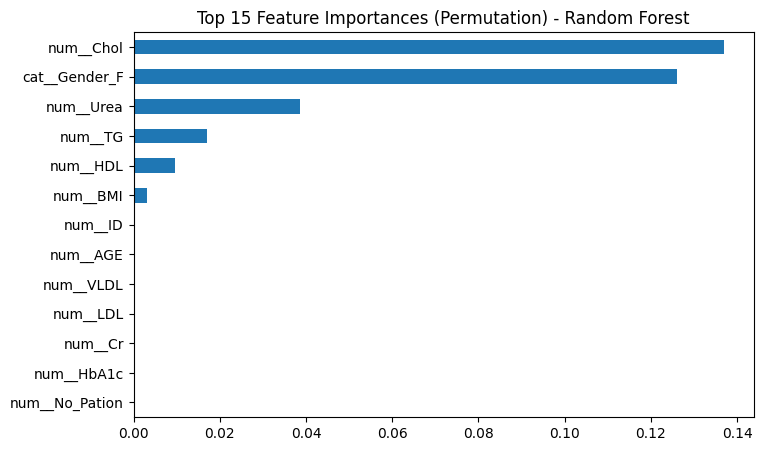

In [27]:
plt.figure(figsize=(8,5))
imp.head(15).sort_values().plot(kind="barh")
plt.title(f"Top 15 Feature Importances (Permutation) - {best['model']}")
plt.show()

# Error Analysis

In [28]:
preds = best_model.predict(X_test)
errors = X_test.copy()
errors["true"] = y_test.values
errors["pred"] = preds
errors = errors[errors["true"] != errors["pred"]]

print("\nNumber of misclassified samples:", len(errors))
display(errors.head(10))

if len(errors) > 0:
    print("\nMean feature values for common confusion pairs (numeric only):")
    display(errors.groupby(["true","pred"])[num_cols].mean())


Number of misclassified samples: 1


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,true,pred
152,135,45397,M,54,4.0,88,5.7,4.4,2.9,0.6,2.5,1.3,28.0,P,Y



Mean feature values for common confusion pairs (numeric only):


,,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
true,pred,,,,,,,,,,,,
P,Y,135.0,45397.0,54.0,4.0,88.0,5.7,4.4,2.9,0.6,2.5,1.3,28.0
